In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
plt.rc('font',family='Malgun Gothic')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import random

# 6개월간 데이터 불러오기

In [2]:
kospi=pd.read_csv('KOSPI_2022_0222_0822.csv',encoding='cp949')
kospi.head(10)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022-08-22,2462.50,-30.19,-1.21,2467.38,2475.77,2457.08,422552,6108019.0,1.940000e+09
1,2022-08-19,2492.69,-15.36,-0.61,2510.72,2510.72,2492.69,459835,7138648.0,1.960000e+09
2,2022-08-18,2508.05,-8.42,-0.33,2499.30,2515.37,2488.09,381628,7105985.0,1.980000e+09
3,2022-08-17,2516.47,-17.05,-0.67,2536.57,2543.15,2512.01,418053,7153680.0,1.980000e+09
4,2022-08-16,2533.52,5.58,0.22,2543.05,2546.35,2532.20,398335,8064107.0,2.000000e+09
5,2022-08-12,2527.94,4.16,0.16,2519.66,2533.20,2514.31,445547,8028577.0,1.990000e+09
6,2022-08-11,2523.78,42.90,1.73,2507.74,2523.78,2506.41,505246,9710840.0,1.990000e+09
7,2022-08-10,2480.88,-22.58,-0.90,2493.70,2494.15,2478.21,479467,9029482.0,1.950000e+09
8,2022-08-09,2503.46,10.36,0.42,2493.57,2506.49,2481.36,454364,8940803.0,1.970000e+09
9,2022-08-08,2493.10,2.30,0.09,2481.17,2494.00,2477.76,418234,7613758.0,1.960000e+09


In [3]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      124 non-null    object 
 1   종가      124 non-null    float64
 2   대비      124 non-null    float64
 3   등락률     124 non-null    float64
 4   시가      124 non-null    float64
 5   고가      124 non-null    float64
 6   저가      124 non-null    float64
 7   거래량     124 non-null    int64  
 8   거래대금    124 non-null    float64
 9   상장시가총액  124 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.8+ KB


In [4]:
def get_log_percent_change_df(df):
    change=[]

    for i in range(len(df)-1):
        yesterday_close=df['종가'].iloc[i+1]
        today_close=df['종가'].iloc[i]
        change.append(np.log(today_close)-np.log(yesterday_close))

    return change

box=get_log_percent_change_df(kospi)

In [5]:
box

[-0.01218535457054859,
 -0.006143110141441532,
 -0.003351567067828576,
 -0.006752514276228361,
 0.0022048982944182782,
 0.0016469641786676092,
 0.017144441700866153,
 -0.00906043908270071,
 0.004146858977478907,
 0.0009229720352639248,
 0.007127476077910977,
 0.00472586074582626,
 0.008908317720606185,
 -0.0051636809904715975,
 0.0003058883531368295,
 0.006642448764780262,
 0.008138908620307639,
 0.0010645150938257686,
 0.0038491530193560664,
 0.004398745426023254,
 -0.006671827842988698,
 0.009303634031114782,
 0.0066753508825883046,
 -0.001803540990578334,
 0.018813915096490774,
 0.0037220939969291322,
 -0.0027048370260907006,
 0.004670321012568479,
 -0.009665105303877652,
 -0.004408561611827011,
 0.0069756605327899734,
 0.01827004656301856,
 -0.021482162112318015,
 0.017854385860177402,
 -0.0022059343343991955,
 -0.011737800943114607,
 -0.019254919670906645,
 -0.01837521076764581,
 0.00836238628846342,
 0.01481409155614255,
 0.022338418080219746,
 -0.012235155733068659,
 -0.02783160

In [6]:
returns=[]

for k in range(1000000):
    sample=[]

    for i in range(125):
        sample.append(random.choice(box))
    
    # 로그 수익률을 더하고, e의 지수로 올립니다
    percent_return=(np.exp(sum(sample))-1)*100
    returns.append(percent_return)

In [7]:
pd.DataFrame(returns).describe()

,0
count,1000000.000000
mean,-8.482569
std,11.409889
min,-52.924108
25%,-16.462050
50%,-9.132381
75%,-1.187048
max,62.815929


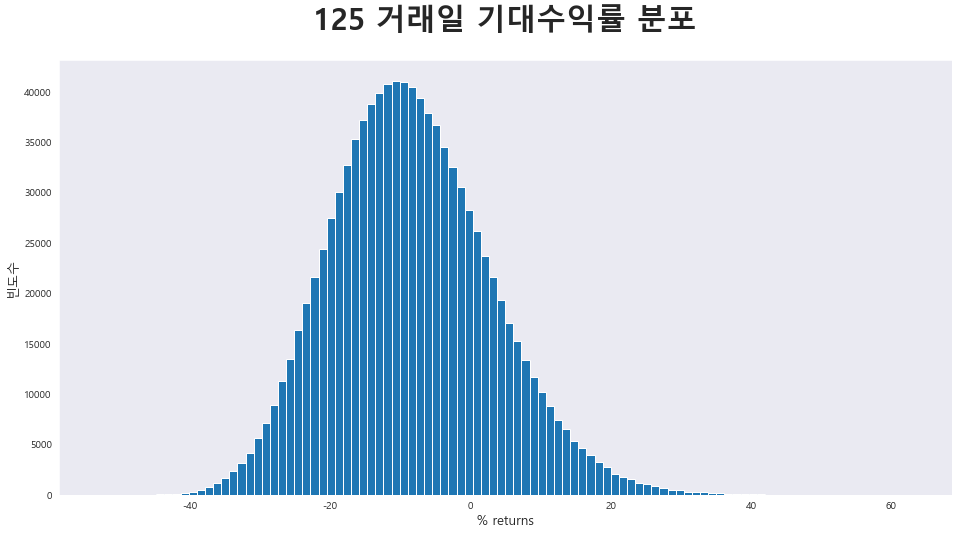

In [8]:
# 1 sigma
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title(label='125 거래일 기대수익률 분포',fontsize=30,fontweight='bold',pad=30)
ax.set_xlabel('% returns',fontsize=13)
ax.set_ylabel('빈도수',fontsize=13)
# ax.vlines()
ax.hist(x=returns,bins=100);

In [11]:
pctl_5=np.percentile(returns,5)

In [20]:
np.percentile(returns,5)

-26.065683076426005

In [22]:
np.percentile(returns,50-68/2),np.percentile(returns,50+68/2)

(-19.758156906618645, 2.7850800334717554)

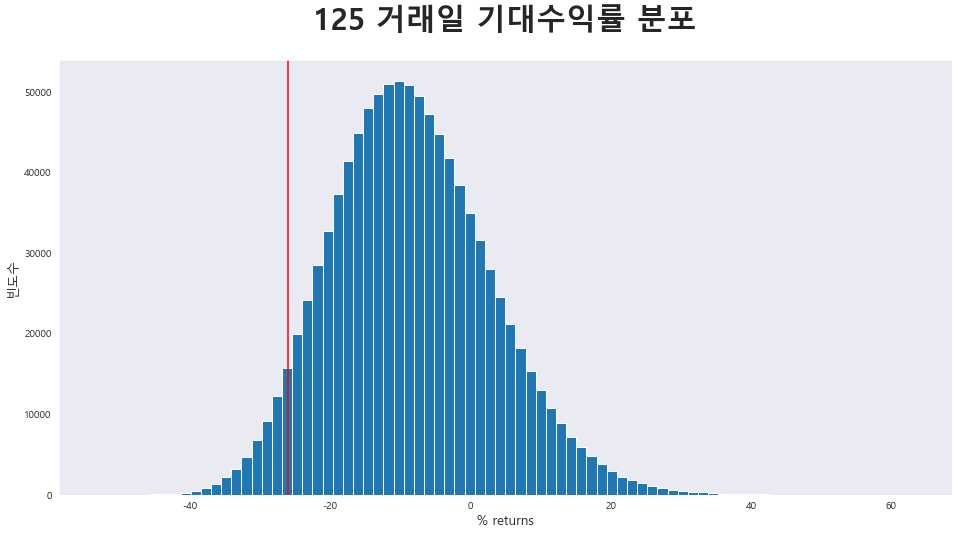

In [19]:
# VaR vline
from turtle import color

fig,ax=plt.subplots(figsize=(16,8))
ax.set_title(label='125 거래일 기대수익률 분포',fontsize=30,fontweight='bold',pad=30)
ax.set_xlabel('% returns',fontsize=13)
ax.set_ylabel('빈도수',fontsize=13)
ax.axvline(x=pctl_5,ymin=0,ymax=1,color='red')
ax.hist(x=returns,bins=80);